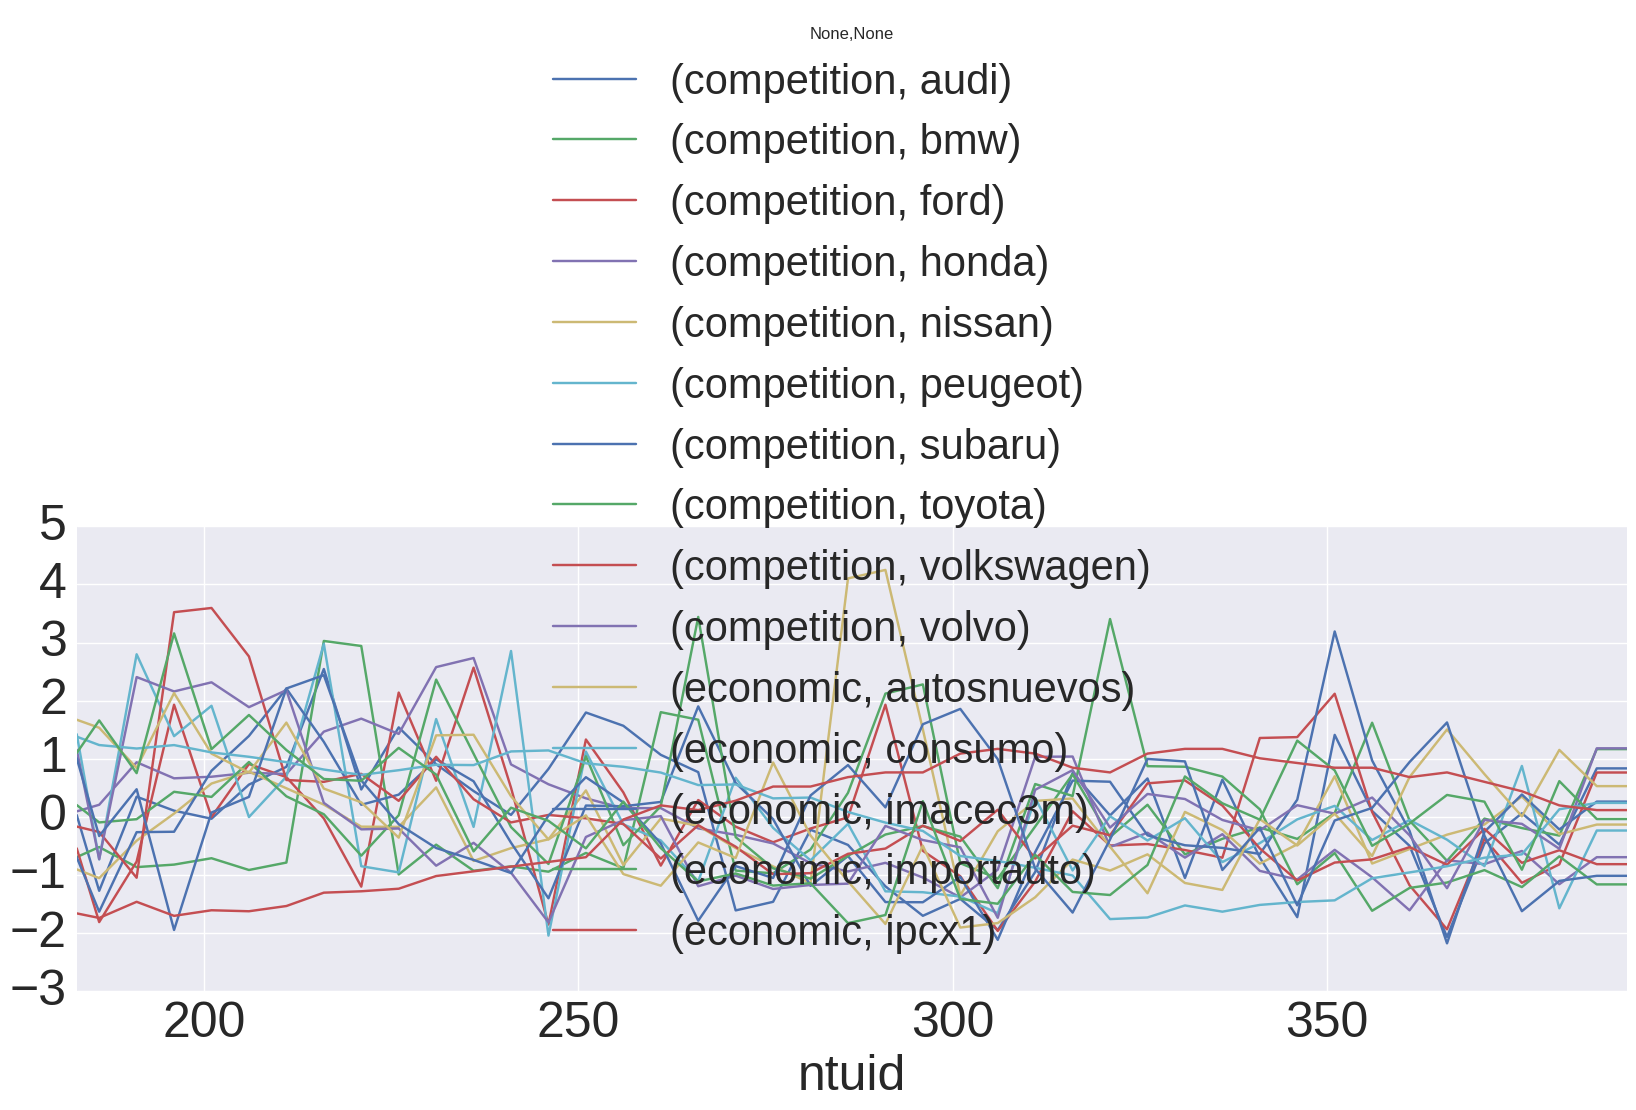

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import pandas as pd
import g3py as g3
g3.style_big_seaborn()


X = pd.read_pickle('data/economic_X.pkl')
Y = pd.read_pickle('data/economic_Y.pkl')
n_c = X.competition.shape[1]
n_e = X.economic.shape[1]

X.plot()

In [2]:
kernel = g3.SE((X.competition, [0,1,2,3,4,5,6,7,8,9]),'competition') + \
         g3.SE((X.economic, [10,11,12,13,14]),'economic')
#kernel = g3.SE(X,'total')
gp = g3.GaussianProcess(X, g3.Zero(), kernel, noise=True)

Space Dimensions:  (208, 15)
Definition OK
Compilation OK


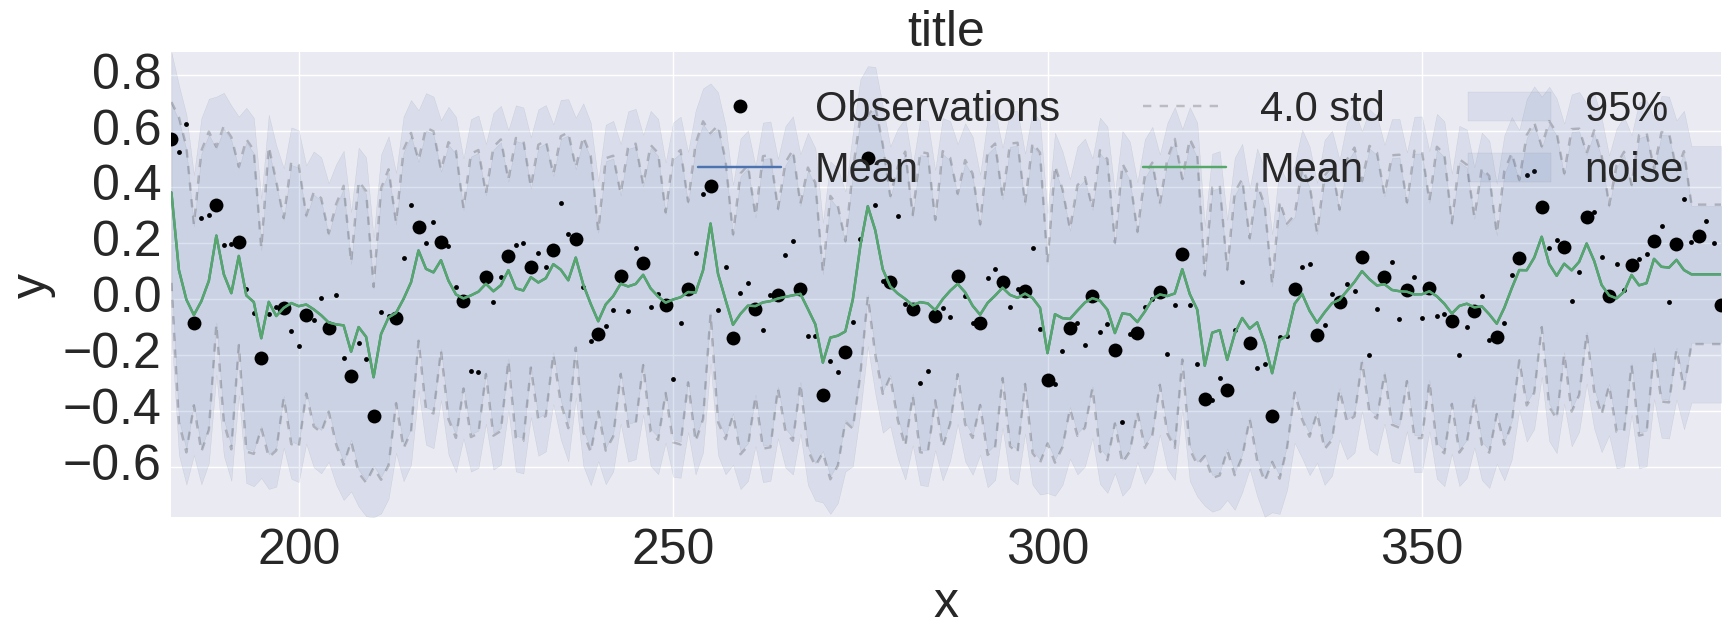

In [7]:
gp.observed(X[::3], Y[::3])
g3.plot(Y,'.k')
gp.plot()

Starting function value (-logp): -19.6913


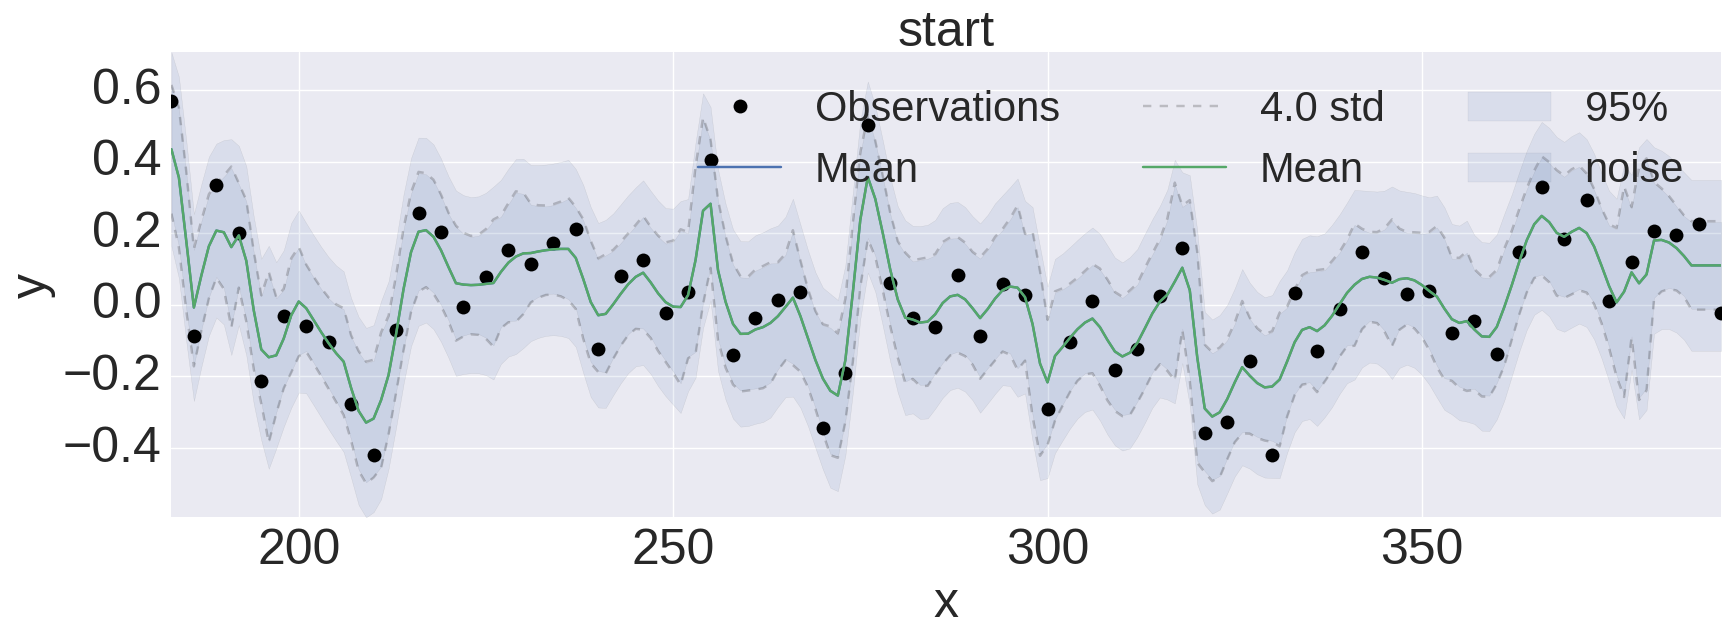


start_bfgs
         Current function value: -19.691284
         Iterations: 0
         Function evaluations: 76
         Gradient evaluations: 64


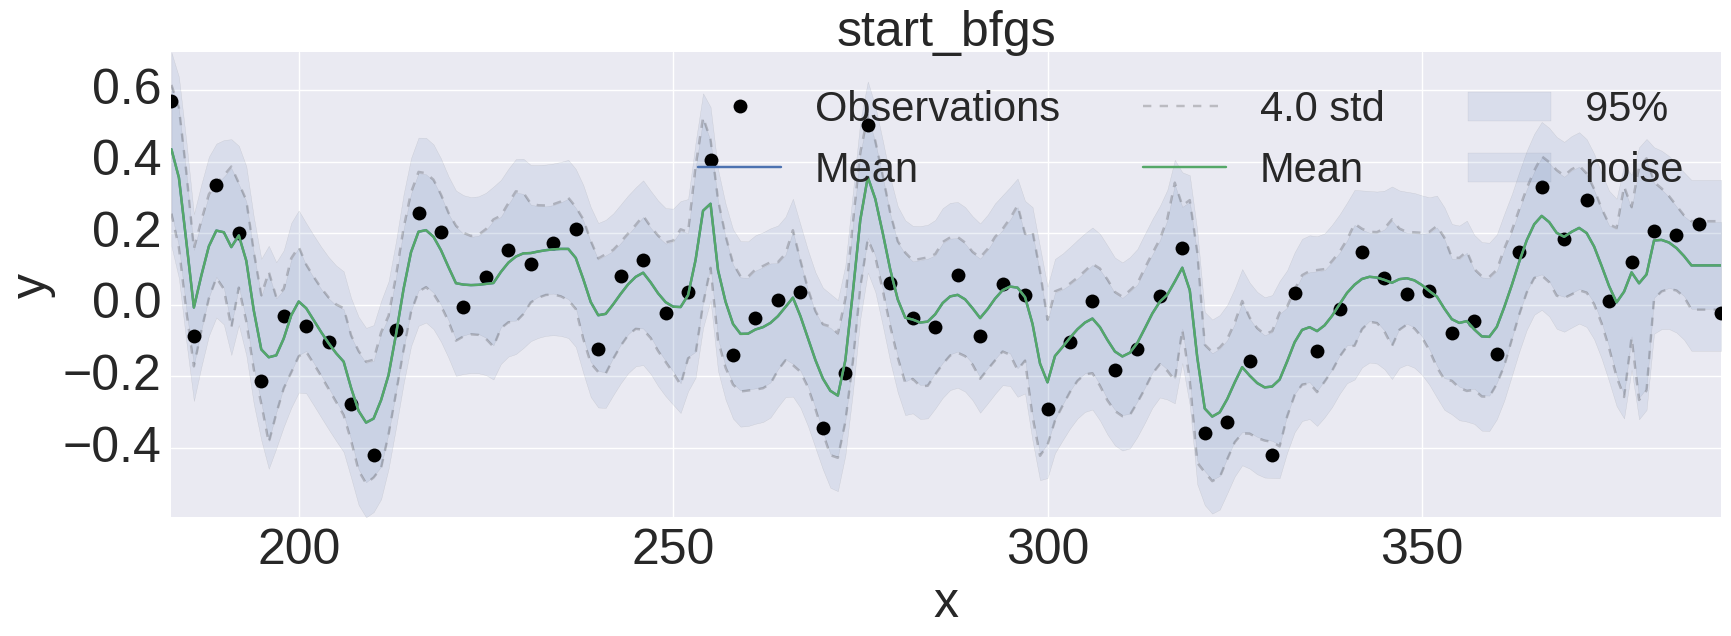


start_powell
Optimization terminated successfully.
         Current function value: -19.691292
         Iterations: 1
         Function evaluations: 404


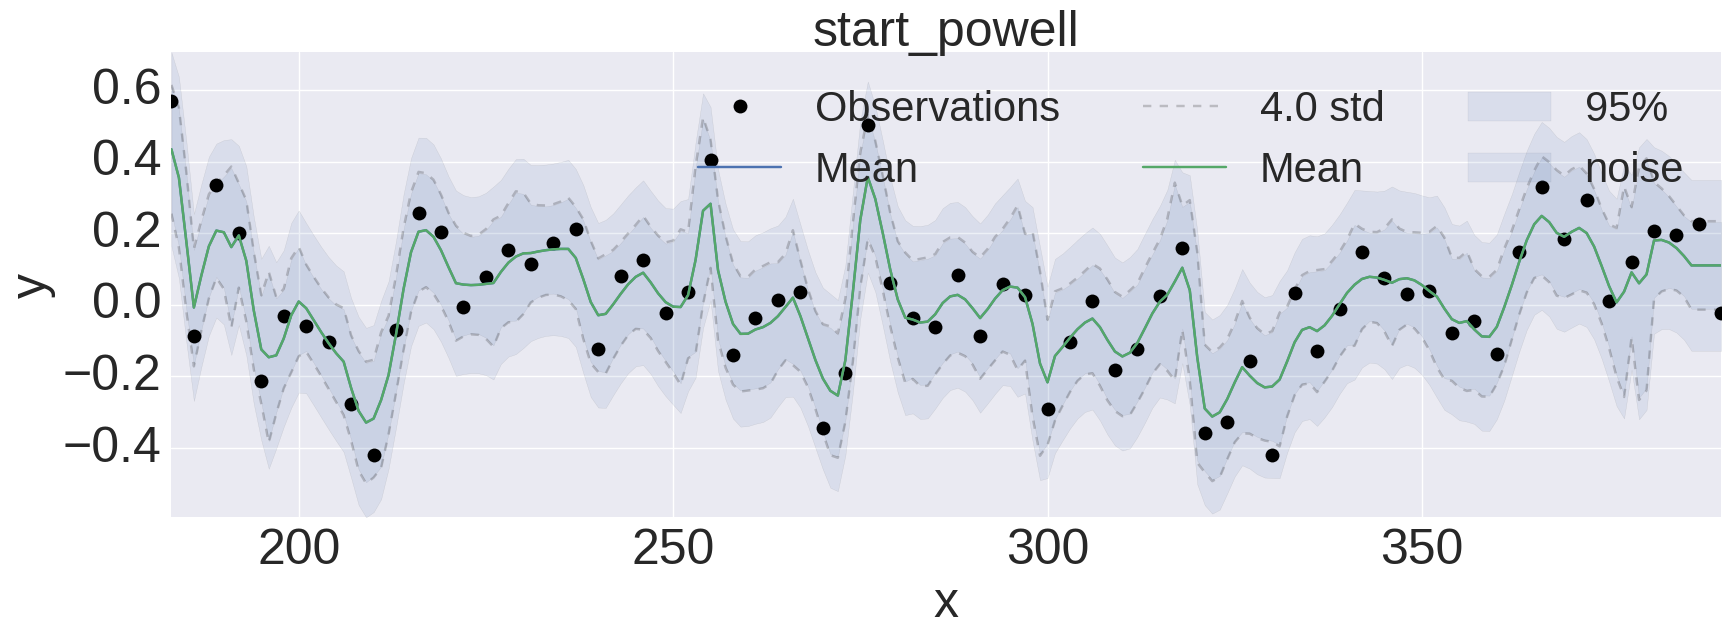

In [15]:
params = gp.find_MAP(points=2, plot=True)

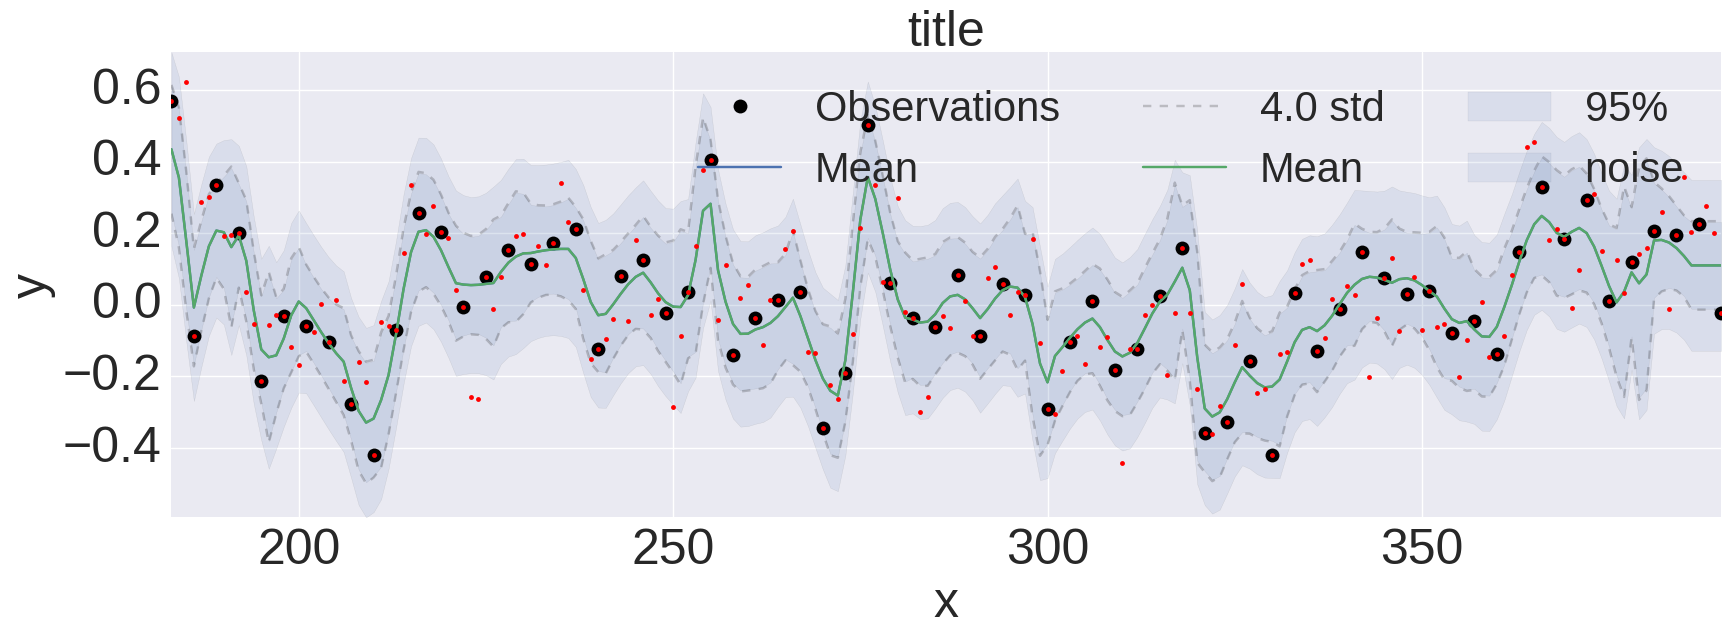

In [16]:
gp.set_params(params)
gp.plot()
g3.plot(Y, '.r')